1.Simple linear regression

In [ ]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("w1_student_scores.csv")

In [ ]:
df.head()

# matplotlib ---> for plotting the graph

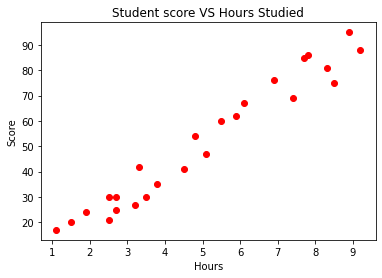

In [6]:
from matplotlib import pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(df['Hours'], df['Scores'], 'ro')
plt.title('Student score VS Hours Studied')
plt.xlabel('Hours')
plt.ylabel('Score')

plt.show()

#Find Coeffients

Calculate the mean of input and output

In [9]:
xmean = np.mean(df['Hours'])
ymean = np.mean(df['Scores'])

Calculate the termd needed forthe number and dominator of beta

In [16]:
df['xycov'] = (df['Hours'] - xmean) * (df['Scores'] - ymean)
df['xvar'] = (df['Hours'] - xmean)**2

calculate the coeffient

In [17]:
slope = df['xycov'].sum()/df['xvar'].sum()
intercept = ymean - (slope * xmean)
print(f'slope = {slope}')
print(f'intercept = {intercept}')

slope = 9.775803390787473
intercept = 2.4836734053731817


#Making Prediction


In [18]:
intercept + slope*7

70.9142971408855

In [19]:
Scores_predicted = intercept + slope * df['Hours']

Compute the score of a student who studied for 7 hours


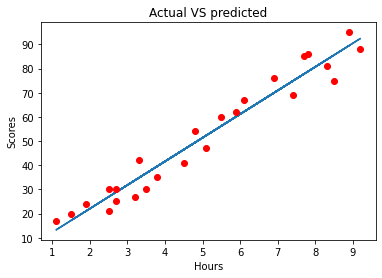

In [20]:
plt.figure(figsize=(6,4))
plt.plot(df['Hours'], Scores_predicted) #regression line
plt.plot(df['Hours'] , df["Scores"] , 'ro') #scatter plot showing actual data
plt.title('Actual VS predicted')
plt.xlabel('Hours')
plt.ylabel('Scores')

plt.show()

#Multiple linear regression


In [22]:
df = pd.read_csv("w1_petrol_consumption.csv")

In [23]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [24]:
df.shape

(48, 5)

In [26]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0,7.67,0.95,5.00,7.00,7.50,8.12,10.00
Average_income,48.0,4241.83,573.62,3063.00,3739.00,4298.00,4578.75,5342.00
Paved_Highways,48.0,5565.42,3491.51,431.00,3110.25,4735.50,7156.00,17782.00
Population_Driver_licence(%),48.0,0.57,0.06,0.45,0.53,0.56,0.60,0.72
Petrol_Consumption,48.0,576.77,111.89,344.00,509.50,568.50,632.75,968.00


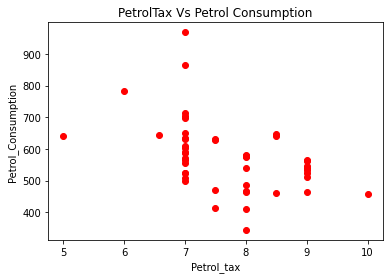

In [28]:
plt.figure(figsize=(6,4))
plt.plot(df['Petrol_tax'] , df['Petrol_Consumption'] , 'ro')
plt.title('PetrolTax Vs Petrol Consumption')
plt.xlabel('Petrol_tax')
plt.ylabel('Petrol_Consumption')

plt.show()

Identify Quatiles

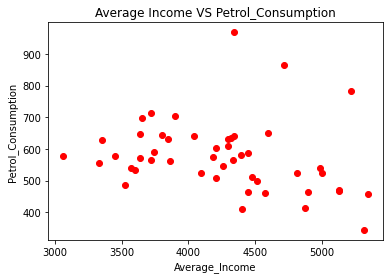

In [29]:
plt.figure(figsize=(6,4))
plt.plot(df['Average_income'], df['Petrol_Consumption'] , 'ro')
plt.title('Average Income VS Petrol_Consumption')
plt.xlabel('Average_Income')
plt.ylabel('Petrol_Consumption')

plt.show()

#Train the model

In [33]:
Y = df['Petrol_Consumption']
X = df[['Average_income' , 'Paved_Highways' , 'Population_Driver_licence(%)' , 'Petrol_tax']]

In [34]:
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split(X,Y , test_size=0.2,random_state=42)

In [35]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [36]:
regressor.intercept_

361.4508790666843

In [37]:
regressor.coef_

array([-5.65355145e-02, -4.38217137e-03,  1.34686930e+03, -3.69937459e+01])

#Make Prediction

In [38]:
y_pred = regressor.predict(X_test)

In [41]:
results = pd.DataFrame({'Actual': Y_test, 'Predicted':y_pred})
print(results)

    Actual   Predicted
27     631  606.692665
40     587  673.779442
26     577  584.991490
43     591  563.536910
24     460  519.058672
37     704  643.461003
12     525  572.897614
19     640  687.077036
4      410  547.609366
25     566  530.037630


#Evaluating the model

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(Y_test , y_pred)
MSE = mean_squared_error(Y_test , y_pred)
RMSE = np.sqrt(MSE)

print(f'Mean absolute error: {MAE:.2f}')
print(f'Mean squared error: {MSE:.2f}')
print(f'Root mean squared error: {RMSE:.2f}')

Mean absolute error: 53.47
Mean squared error: 4083.26
Root mean squared error: 63.90


In [43]:
regressor.score(X_test , Y_test)

0.3913664001430557

In [45]:
regressor.score(X_train , Y_train)

0.7068781342155136